In [1]:
import gzip
import json
import re
import os
import sys
import numpy as np
import pandas as pd
import sklearn.model_selection
import scipy
import sklearn.metrics.pairwise as pw
from time import time
import matplotlib.pyplot as plt

In [98]:
# Specify your directory
DIR = r'C:\Users\Jackie\OneDrive - Georgia Institute of Technology\ISYE6740 Computational Data Analytics\Project\Data\Genres\YoungAdult'

In [99]:
# Load pickled files
df = pd.read_pickle('morethan2.pkl')

In [100]:
df

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
3,8842281e1d1347389f2ab93d60773d4d,8684868,d29b8238762d70b7c2b67941bc81fbe0,True,3,,Tue Dec 17 13:42:25 -0800 2013,Tue Dec 17 13:47:26 -0800 2013,Sun Dec 15 00:00:00 -0800 2013,Sat Dec 14 00:00:00 -0800 2013
4,8842281e1d1347389f2ab93d60773d4d,8423493,357c8c178fd0e06cff5c025649231672,True,2,,Sun Dec 08 01:26:12 -0800 2013,Tue Dec 27 05:37:48 -0800 2016,Tue Dec 10 00:00:00 -0800 2013,
5,8842281e1d1347389f2ab93d60773d4d,87976,e6306259819c47f278e78d32a1b73ddf,True,5,,Wed Oct 17 17:49:11 -0700 2012,Wed Oct 17 17:49:11 -0700 2012,,
6,8842281e1d1347389f2ab93d60773d4d,18116,8aa100c7b681e9fedbe2c6bd2c25696a,True,5,,Fri Apr 29 13:14:05 -0700 2011,Fri Apr 29 13:14:05 -0700 2011,,
7,8842281e1d1347389f2ab93d60773d4d,2767052,248c011811e945eca861b5c31a549291,True,5,I cracked and finally picked this up. Very enj...,Wed Jan 13 13:38:25 -0800 2010,Wed Mar 22 11:46:36 -0700 2017,Sun Mar 25 00:00:00 -0700 2012,Fri Mar 23 00:00:00 -0700 2012
...,...,...,...,...,...,...,...,...,...,...
34919249,b0883ebf8e31731f1c5d91e678c26666,19057,10d8eede5d113c8b38963e34b18ac23f,True,5,,Sat Jan 04 22:06:31 -0800 2014,Sat Jan 04 22:06:31 -0800 2014,,
34919250,b0883ebf8e31731f1c5d91e678c26666,13335037,2fbf1a6c3251937d0516ebb94a1b8f9a,True,4,,Sat Feb 23 20:39:16 -0800 2013,Sun Jun 08 20:38:36 -0700 2014,,
34919251,b0883ebf8e31731f1c5d91e678c26666,1295102,92da594d785e9adc31c4fcaba2e5e245,True,4,,Sat Jul 21 08:40:15 -0700 2012,Wed Jan 16 18:16:35 -0800 2013,,
34919252,b0883ebf8e31731f1c5d91e678c26666,11870085,a40bfd0e6e03ab27d5ae4494869d47f9,True,5,,Sat Jul 21 08:35:43 -0700 2012,Sat Jul 21 08:35:46 -0700 2012,,


In [101]:
df['book_id'].value_counts()

2767052     273191
41865       230084
6148028     166266
11870085    163632
7260188     157268
             ...  
9024701          3
19030181         3
3863184          3
11456584         3
6304354          3
Name: book_id, Length: 76895, dtype: int64

(array([7.6838e+04, 3.8000e+01, 6.0000e+00, 5.0000e+00, 3.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([3.000000e+00, 2.732180e+04, 5.464060e+04, 8.195940e+04,
        1.092782e+05, 1.365970e+05, 1.639158e+05, 1.912346e+05,
        2.185534e+05, 2.458722e+05, 2.731910e+05]),
 <BarContainer object of 10 artists>)

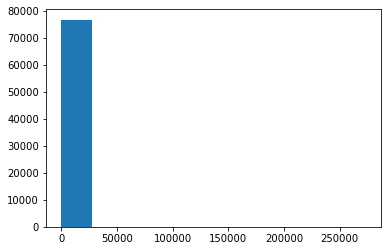

In [102]:
plt.hist(df['book_id'].value_counts())

(array([13000., 10334.,  7230.,  5462., 13857., 20735.]),
 array([  1,   2,   3,   4,   5,  10, 100]),
 <BarContainer object of 6 artists>)

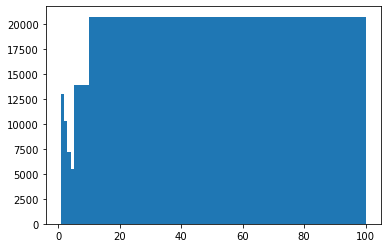

In [21]:
plt.hist(df['book_id'].value_counts(), bins=[1,2,3,4,5,10,100])

In [4]:
# The Young Adult genre has the highest interaction / book ratio: 34,919,254 interactions and 93,398 books
#interactions = load_data(os.path.join(DIR, 'goodreads_interactions_young_adult.json.gz'))

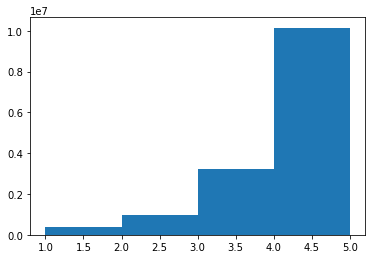

In [5]:
plt.hist(df['rating'], bins=[1,2,3,4,5])
plt.show()

In [151]:
morethan_bid = df['book_id'].value_counts()[df['book_id'].value_counts()>500].index
morethan_filter = df['book_id'].isin(morethan_bid)
morethan_df = df.loc[morethan_filter]
morethan_df

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
3,8842281e1d1347389f2ab93d60773d4d,8684868,d29b8238762d70b7c2b67941bc81fbe0,True,3,,Tue Dec 17 13:42:25 -0800 2013,Tue Dec 17 13:47:26 -0800 2013,Sun Dec 15 00:00:00 -0800 2013,Sat Dec 14 00:00:00 -0800 2013
4,8842281e1d1347389f2ab93d60773d4d,8423493,357c8c178fd0e06cff5c025649231672,True,2,,Sun Dec 08 01:26:12 -0800 2013,Tue Dec 27 05:37:48 -0800 2016,Tue Dec 10 00:00:00 -0800 2013,
5,8842281e1d1347389f2ab93d60773d4d,87976,e6306259819c47f278e78d32a1b73ddf,True,5,,Wed Oct 17 17:49:11 -0700 2012,Wed Oct 17 17:49:11 -0700 2012,,
6,8842281e1d1347389f2ab93d60773d4d,18116,8aa100c7b681e9fedbe2c6bd2c25696a,True,5,,Fri Apr 29 13:14:05 -0700 2011,Fri Apr 29 13:14:05 -0700 2011,,
7,8842281e1d1347389f2ab93d60773d4d,2767052,248c011811e945eca861b5c31a549291,True,5,I cracked and finally picked this up. Very enj...,Wed Jan 13 13:38:25 -0800 2010,Wed Mar 22 11:46:36 -0700 2017,Sun Mar 25 00:00:00 -0700 2012,Fri Mar 23 00:00:00 -0700 2012
...,...,...,...,...,...,...,...,...,...,...
34919249,b0883ebf8e31731f1c5d91e678c26666,19057,10d8eede5d113c8b38963e34b18ac23f,True,5,,Sat Jan 04 22:06:31 -0800 2014,Sat Jan 04 22:06:31 -0800 2014,,
34919250,b0883ebf8e31731f1c5d91e678c26666,13335037,2fbf1a6c3251937d0516ebb94a1b8f9a,True,4,,Sat Feb 23 20:39:16 -0800 2013,Sun Jun 08 20:38:36 -0700 2014,,
34919251,b0883ebf8e31731f1c5d91e678c26666,1295102,92da594d785e9adc31c4fcaba2e5e245,True,4,,Sat Jul 21 08:40:15 -0700 2012,Wed Jan 16 18:16:35 -0800 2013,,
34919252,b0883ebf8e31731f1c5d91e678c26666,11870085,a40bfd0e6e03ab27d5ae4494869d47f9,True,5,,Sat Jul 21 08:35:43 -0700 2012,Sat Jul 21 08:35:46 -0700 2012,,


In [166]:
morethanratings_bid = morethan_df['user_id'].value_counts()[df['user_id'].value_counts()>50].index
morethanratings_filter = df['user_id'].isin(morethanratings_bid)
morethanratings_df = df.loc[morethanratings_filter]
morethanratings_df

,user_id,book_id,review_id,is_read,rating,review_text_incomplete,date_added,date_updated,read_at,started_at
2641,012515e5802b2e0f42915118c90fa04b,13206828,1d5b64fe0408bb5e1824d14631ccb5ee,True,5,LET'S JUST SAY I AM SO THANKFUL I HAVE THE NEX...,Sat Sep 23 08:39:21 -0700 2017,Sat Sep 30 11:30:46 -0700 2017,Thu Sep 28 16:51:17 -0700 2017,Sun Sep 24 00:00:00 -0700 2017
2642,012515e5802b2e0f42915118c90fa04b,13206900,9de8dc1b8fa869233251e2a6eb783552,True,4,I can't believe it's over 😢,Sat Sep 23 08:39:03 -0700 2017,Sat Oct 07 18:02:29 -0700 2017,Sat Oct 07 00:00:00 -0700 2017,Thu Sep 28 00:00:00 -0700 2017
2643,012515e5802b2e0f42915118c90fa04b,13206760,1fc0c08b3224b734b51996989ce52344,True,5,I didn't know if I would enjoy the book being ...,Wed Sep 20 04:51:35 -0700 2017,Sat Sep 30 11:30:43 -0700 2017,Sun Sep 24 14:08:38 -0700 2017,Thu Sep 21 00:00:00 -0700 2017
2650,012515e5802b2e0f42915118c90fa04b,25785357,bd32b0bc61d3d7250abd19931bc0d328,True,4,,Sat Aug 26 20:18:15 -0700 2017,Sat Aug 26 20:18:49 -0700 2017,Sat Aug 26 00:00:00 -0700 2017,Wed Aug 23 00:00:00 -0700 2017
2654,012515e5802b2e0f42915118c90fa04b,23174274,b8cc88b5ce926cfa7f42ff258f653b91,True,3,,Mon Aug 29 07:52:11 -0700 2016,Sat Oct 21 09:13:53 -0700 2017,Sat Oct 21 09:13:53 -0700 2017,Mon Oct 16 14:39:13 -0700 2017
...,...,...,...,...,...,...,...,...,...,...
34910823,e16a5b46d4657be66169dd43be0c79e8,11387392,80a383b99ee3c7a256b61f494d6f0acb,True,3,,Fri Nov 23 21:25:20 -0800 2012,Fri Mar 15 14:56:40 -0700 2013,,
34910824,e16a5b46d4657be66169dd43be0c79e8,6148028,22c09522de7da0bfbb596639ef55719a,True,4,,Fri Nov 23 21:24:39 -0800 2012,Fri Nov 23 21:24:39 -0800 2012,,
34910825,e16a5b46d4657be66169dd43be0c79e8,7260188,f1f72b60aa7ab44e2ca1a93c3f2af6d9,True,4,,Fri Nov 23 21:24:35 -0800 2012,Fri Nov 23 21:24:35 -0800 2012,,
34910826,e16a5b46d4657be66169dd43be0c79e8,2767052,0e4469f9999b9d448d84400bc7b92ce2,True,5,,Fri Nov 23 21:24:33 -0800 2012,Fri Nov 23 21:24:33 -0800 2012,,


In [213]:
#morethanratings_df.to_pickle("atleast500ratings50books.pkl")

In [167]:
morethanratings_df['user_id'].value_counts()

90bfc5ade175df9f6f935ded51ed2537    922
4117fd790b397a6d6ce61f4dbff678cf    803
e4270b8639776c7f0634aba4b5b1e0dc    792
98f7558f89bf885fd88ff12cc0b8a705    744
51f000161608b0175f4a0c43fdbbe298    737
                                   ... 
5f920b26bb19e1de542d4b055b8249d8     51
3a98af7a7e08d997fa3bfbbb5dbe6c11     51
d6d952a7ff05fc1c7073d4fd33c0bab4     51
334c5716164d051ec809a79ca0c7e7a9     51
136a0d69e626656e754fcbacf61a39e9     51
Name: user_id, Length: 55964, dtype: int64

In [168]:
# Set the dataframe to be used
df = morethanratings_df

In [169]:
# Calculate average rating
avg_rating = np.mean(df['rating'])
avg_rating

3.9592542580101724

In [170]:
# Define user-book rating matrix
mat = df.pivot(index='user_id', columns='book_id', values='rating')
mat.replace(0, np.nan, inplace=True)

In [171]:
# Breaking it down still gets the same error
# mat1 = df.set_index(['user_id', 'book_id'])
# mat2 = mat1['rating']
# mat3 = mat2.unstack('book_id')

In [172]:
mat

book_id,10025007,10025305,10048874,10118172,10165727,10165761,10174795,10188580,101914,10193062,...,9917938,9917945,9917998,9918083,9918128,99561,9961796,9972838,9972882,9975679
user_id,,,,,,,,,,,,,,,,,,,,,
000192962b87d560f00b06fdcbd71681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
000387b0e3d77b6dcc36a66d5cc27347,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,3.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
0007f8dd09337afd986d765569cf0110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
000883382802f2d95a3dd545bb953882,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000891e40dc9b9a6726caff9232be979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffbeab06c4060af4387a8922bf017cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fffcca008c7770bc559e43b2edf24a6d,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
fffce7dae5ac5e8fb6288d81658ececc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN


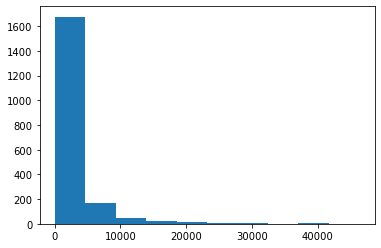

In [173]:
plt.hist(mat.count())
plt.show()

In [174]:
np.max(mat.count())

46342

In [175]:
# Train/test split
train, test = sklearn.model_selection.train_test_split(df, test_size=0.1, random_state=1111)
train.shape, test.shape

((4896776, 10), (544087, 10))

In [176]:
# Set all test values to nan
mat_trainonly = mat
zipped_test = np.c_[test['user_id'], test['book_id'], test['rating']]
test_mask = np.full(mat.shape, False)
for i in range(len(zipped_test)):
    row_idx = mat_trainonly.index.get_loc(zipped_test[i][0])
    col_idx = mat_trainonly.columns.get_loc(zipped_test[i][1])
    test_mask[row_idx, col_idx] = True
test_actuals = np.array(mat)[test_mask] # Save test actuals
mat_trainonly[test_mask] = np.nan

In [177]:
mat_trainonly.at[zipped_test[0][0], zipped_test[0][1]]

nan

In [178]:
# Calculate sparsity of data
not_null = mat_trainonly.count().sum()
sparsity = 1 - not_null / (mat.shape[0] * mat_trainonly.shape[1])
sparsity

0.955105860584201

In [179]:
mat_trainonly.count().sort_values(ascending=False)

book_id
2767052     41720
41865       36939
6148028     35641
7260188     34663
256683      33513
            ...  
14762463      107
7776692       100
18626858      100
6596839        82
1242729        37
Length: 1949, dtype: int64

In [180]:
# Calculate average rating for each book over users
avg_book_rating = np.nanmean(mat_trainonly, axis=0) # column avg r_j
# For empty columns, fill with avg rating
np.nan_to_num(avg_book_rating, copy=False, nan=avg_rating)

# Fill missing value with the appropriate average for that book
filled = np.where(np.isnan(mat_trainonly), avg_book_rating, mat_trainonly)

In [181]:
# Remove from each user (row) the mean over all books
avg_user_rating = np.average(filled, axis=1) # row avg r_i
avg_user_rating_col_vec = avg_user_rating.reshape(len(avg_user_rating),1)
normalized = filled - avg_user_rating_col_vec

In [182]:
normalized

array([[-0.07022531,  0.61177979, -0.06332044, ..., -0.49859838,
        -0.40473205, -0.04079204],
       [-0.0362534 ,  0.14656869, -0.02934853, ..., -0.46462647,
        -0.37076014, -0.00682014],
       [-0.09028168,  0.59172341, -0.08337681, ..., -0.51865475,
        -0.42478842, -0.06084842],
       ...,
       [-0.06884702,  0.61315807, -0.06194215, ..., -0.4972201 ,
        -0.40335376, -0.03941376],
       [-0.0616276 ,  0.12119449, -0.05472273, ..., -0.49000067,
        -0.39613434, -0.03219434],
       [-0.07195063,  0.61005446, -0.06504576, ..., -0.50032371,
        -0.40645737, -0.04251737]])

In [183]:
normalized.shape

(55964, 1949)

In [184]:
# Perform SVD, decide on a rank k, and calculate a reduced rating matrix to remove noise
# Can use sparse matrix algorithms because of special structure
# How to choose k: if top few values are big and the rest are small, take the big values. So chose k=11
U, S, VT = scipy.sparse.linalg.svds(normalized, k=6) # CHANGE BACK TO k=11

In [185]:
#U, S, VT = np.linalg.svd(normalized) #k=10

# U = U[:, :9]
# S = S[:9]
# VT = VT[:9, :]

In [186]:
S

array([ 197.11094996,  206.02246783,  235.884627  ,  288.90619312,
        426.87582176, 3100.82739549])

In [187]:
U.shape, S.shape, VT.shape

((55964, 6), (6,), (6, 1949))

In [188]:
reduced_rating = U @ np.diag(S) @ VT

In [189]:
reduced_rating # SHOULD THIS BE >=1? Maybe not, because it's already been reduced

array([[-0.06375013,  0.63695487, -0.05966438, ..., -0.49593893,
        -0.40232736, -0.03561533],
       [-0.06330713,  0.59561203, -0.05858645, ..., -0.51451268,
        -0.41004404, -0.03819888],
       [-0.0879846 ,  0.62221055, -0.07390579, ..., -0.51213455,
        -0.41935211, -0.04417875],
       ...,
       [-0.06499185,  0.37801491, -0.05764105, ..., -0.50804553,
        -0.40583802, -0.03837744],
       [-0.06843728,  0.57969268, -0.05756482, ..., -0.47986264,
        -0.39482071, -0.03595433],
       [-0.08411582,  0.88109445, -0.07447446, ..., -0.51381137,
        -0.42639264, -0.04173111]])

In [190]:
reduced_rating.shape

(55964, 1949)

In [191]:
# Calculate matrix product for dimensionality-reduced rating matrix
sqrtS = np.diag(np.sqrt(S))
meta_on_users = U @ np.transpose(sqrtS)
meta_on_items = sqrtS @ VT

In [192]:
meta_on_items

array([[-0.02029993, -0.83960888,  0.01242481, ..., -0.06379012,
         0.0448467 , -0.00947241],
       [ 0.02450386,  1.45251749,  0.03678856, ...,  0.05269281,
         0.07278831, -0.007491  ],
       [-0.10436373,  0.35629587, -0.03372403, ...,  0.13061514,
         0.01977485,  0.0584226 ],
       [ 0.05735262, -1.26338982,  0.05279932, ...,  0.04960085,
        -0.03970588,  0.04015086],
       [-0.11333262,  0.95613812, -0.09449757, ..., -0.16667095,
        -0.08131211, -0.08496637],
       [-0.29325263,  2.61871547, -0.26370736, ..., -2.1120926 ,
        -1.71378214, -0.16766577]])

In [193]:
# # Calculate similarity of 2 books j and f based on the reduced rating matrix
# # Similarity is the correlation of 2 movies based on average over users
# def similarity(j, f, matrix):
#     j_col = matrix[:, j]
#     f_col = matrix[:, f]
#     numerator = np.sum(np.multiply(j_col, f_col))
#     denominator = np.sqrt(np.multiply(np.sum(np.square(j_col)), np.sum(np.square(f_col))))
#     return numerator / denominator

In [194]:
# num_books = reduced_rating.shape[1]
# t1 = time()
# similarities = np.zeros((num_books, num_books))
# # TODO: is there a faster way to do this?
# for i in range(num_books):
#     for j in range(num_books):
#         similarities[i, j] = similarity(i, j, meta_on_items)
# t2 = time()

In [195]:
# t2-t1

In [196]:
# num_books = reduced_rating.shape[1]
# t1 = time()
# col_prods = meta_on_items.T.dot(meta_on_items)

# similarities2 = np.zeros((num_books, num_books))
# # TODO: is there a faster way to do this?
# for i in range(num_books):
#     for j in range(i, num_books):
#         similarities2[i, j] = col_prods[i, j] / np.sqrt(col_prods[i, i] * col_prods[j, j])
#         similarities2[j, i] = similarities2[i, j]
# t2 = time()

In [197]:
# similarities.shape, t2-t1, np.allclose(similarities, similarities2)

In [198]:
num_books = reduced_rating.shape[1]
t1 = time()
similarities = pw.cosine_similarity(meta_on_items.T, meta_on_items.T)
t2 = time()

In [199]:
similarities.shape, t2-t1

((1949, 1949), 0.01935887336730957)

In [200]:
# # Without reducing dimensionality
# num_books = reduced_rating.shape[1]
# t1 = time()
# similarities = pw.cosine_similarity(reduced_rating.T, reduced_rating.T)
# t2 = time()
# similarities.shape, t2-t1

In [201]:
# # TODO: try optimizing
# # Calculate prediction of rating by user i of book j, by avging over the ratings of all books by the same user, each weighted according to its similarity to book j
# num_users = reduced_rating.shape[0]
# predictions = np.zeros((num_users, num_books))

# # Isolate the set of items which appear to be the most similar to the active item. Vozalis suggests 10 items is best.
# most_similar_idx = np.argsort(similarities, axis=1)[:,-10:]
# for a in range(num_users):
#     for j in range(num_books):
#         numerator = 0
#         denominator = 0
#         # check that similarities are non-negative
#         for k in most_similar_idx[j,:]:
#             sim = similarities[j,k]
#             if sim < 0:
#                 break
#             numerator += sim * (reduced_rating[a,k] + avg_user_rating[a])
#             denominator += sim
#         predictions[a,j] = numerator/denominator

In [214]:
## Select/Rearrange the solumns of arr to match the indices (given by idx)
def select_cols(arr, idx):
    rows = np.indices(idx.shape)[0]
    return arr[rows, idx]

## Set the select columns of arr specified by idx to the corresponding values in vals
def set_select_cols(arr, vals, idx):
    selected_vals = select_cols(vals, idx)
    rows = np.indices(idx.shape)[0]
    arr[rows, idx] = selected_vals
    

# Calculate prediction of rating by user i of book j, by avging over the ratings of all books by the same user, each weighted according to its similarity to book j
num_users = reduced_rating.shape[0]
predictions = np.zeros((num_users, num_books))

# Isolate the set of items which appear to be the most similar to the active item. Vozalis suggests 10 items is best.
t1 = time()

adjusted_rating = reduced_rating + avg_user_rating[:,np.newaxis]

most_similar_idx = np.argsort(similarities, axis=1)[:,:-11:-1]
nonneg_sims = np.where(similarities > 0, similarities, 0)
selected_sims = np.zeros(nonneg_sims.shape)
set_select_cols(selected_sims, nonneg_sims, most_similar_idx)

numerator = adjusted_rating @ selected_sims.T
denominator = np.sum(selected_sims, axis=1)
predictions = np.divide(numerator, denominator)

t2 = time()

print(t2 - t1, predictions.shape, np.min(predictions), np.max(predictions))
predictions

6.532551288604736 True (55964, 1949) (55964, 1949)


In [205]:
# Define error function
def rmse(predictions, actuals):
    return np.sqrt(((predictions - actuals) ** 2).mean())

In [206]:
# Calculate training error
training_mask = np.array(mat_trainonly.notna())
train_predictions = predictions[training_mask]
train_actuals = np.array(mat_trainonly)[training_mask]
train_rmse = rmse(train_predictions, train_actuals)
train_rmse

0.9017928789154105

In [207]:
train_predictions, train_actuals

(array([3.8705314 , 4.10921929, 4.15750083, ..., 4.28969739, 3.63721753,
        3.67024378]),
 array([3., 4., 5., ..., 5., 3., 3.]))

In [208]:
# Calculate test error
#zipped_test = np.c_[test['user_id'], test['book_id'], test['rating']]
test_predictions = predictions[test_mask]
test_rmse = rmse(test_predictions, test_actuals)
test_rmse

0.9145350083745387

In [209]:
test_predictions[:10], test_actuals[:10]

(array([2.87910627, 4.15277419, 4.06934331, 3.91008686, 4.13087439,
        3.8032719 , 3.6878946 , 3.88998835, 4.2850793 , 4.35351137]),
 array([1., 4., 5., 4., 4., 4., 4., 5., 5., 5.]))

In [210]:
# Calculate error if just rated everything the avg rating across all books and users
avg_train = np.full(train_actuals.shape, avg_rating)
avg_train_rmse = rmse(avg_train, train_actuals)
avg_test = np.full(test_actuals.shape, avg_rating)
avg_test_rmse = rmse(avg_test, test_actuals)
avg_train_rmse, avg_test_rmse

(1.0022646680937237, 1.001751619387869)

In [211]:
avg_book_rating_row = avg_book_rating.reshape((1, mat_trainonly.shape[1]))
mat_bookavg = pd.DataFrame(np.repeat(avg_book_rating_row, mat_trainonly.shape[0], axis=0), index=mat_trainonly.index, columns=mat_trainonly.columns)
mat_bookavg

book_id,10025007,10025305,10048874,10118172,10165727,10165761,10174795,10188580,101914,10193062,...,9917938,9917945,9917998,9918083,9918128,99561,9961796,9972838,9972882,9975679
user_id,,,,,,,,,,,,,,,,,,,,,
000192962b87d560f00b06fdcbd71681,3.817178,4.499183,3.824083,3.814786,4.493987,4.582965,3.427642,3.937107,3.924779,4.071099,...,3.932305,4.192308,4.267959,4.28265,4.002677,4.025652,4.095889,3.388805,3.482671,3.846611
000387b0e3d77b6dcc36a66d5cc27347,3.817178,4.499183,3.824083,3.814786,4.493987,4.582965,3.427642,3.937107,3.924779,4.071099,...,3.932305,4.192308,4.267959,4.28265,4.002677,4.025652,4.095889,3.388805,3.482671,3.846611
0007f8dd09337afd986d765569cf0110,3.817178,4.499183,3.824083,3.814786,4.493987,4.582965,3.427642,3.937107,3.924779,4.071099,...,3.932305,4.192308,4.267959,4.28265,4.002677,4.025652,4.095889,3.388805,3.482671,3.846611
000883382802f2d95a3dd545bb953882,3.817178,4.499183,3.824083,3.814786,4.493987,4.582965,3.427642,3.937107,3.924779,4.071099,...,3.932305,4.192308,4.267959,4.28265,4.002677,4.025652,4.095889,3.388805,3.482671,3.846611
000891e40dc9b9a6726caff9232be979,3.817178,4.499183,3.824083,3.814786,4.493987,4.582965,3.427642,3.937107,3.924779,4.071099,...,3.932305,4.192308,4.267959,4.28265,4.002677,4.025652,4.095889,3.388805,3.482671,3.846611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffbeab06c4060af4387a8922bf017cc,3.817178,4.499183,3.824083,3.814786,4.493987,4.582965,3.427642,3.937107,3.924779,4.071099,...,3.932305,4.192308,4.267959,4.28265,4.002677,4.025652,4.095889,3.388805,3.482671,3.846611
fffcca008c7770bc559e43b2edf24a6d,3.817178,4.499183,3.824083,3.814786,4.493987,4.582965,3.427642,3.937107,3.924779,4.071099,...,3.932305,4.192308,4.267959,4.28265,4.002677,4.025652,4.095889,3.388805,3.482671,3.846611
fffce7dae5ac5e8fb6288d81658ececc,3.817178,4.499183,3.824083,3.814786,4.493987,4.582965,3.427642,3.937107,3.924779,4.071099,...,3.932305,4.192308,4.267959,4.28265,4.002677,4.025652,4.095889,3.388805,3.482671,3.846611


In [212]:
# BEST COMPARISON
# Calculate error if just rated everything the avg rating per book across all users
book_avg_train = np.array(mat_bookavg)[training_mask]
book_avg_train_rmse = rmse(book_avg_train, train_actuals)
book_avg_test = np.array(mat_bookavg)[test_mask]
book_avg_test_rmse = rmse(book_avg_test, test_actuals)
book_avg_train_rmse, book_avg_test_rmse

(0.9541063883618909, 0.9543001512881961)